Python notebook for exploratory data analysis of the City of Chicago Parking Ticket Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import datetime

In [2]:
# read the dataframe
df_CCPT = pd.read_csv('../data/parking_tickets_frac.csv')

In [3]:
df_CCPT.head(5)

Unnamed: 0  ticket_number           issue_date  violation_location  \
0    19727593     9185717028  2014-08-05 21:26:00         1852 N MAUD   
1    19367998       64352592  2014-06-14 09:41:00    4057 N SUNNYSIDE   
2     5681589     9177655732  2009-01-07 19:56:00   3324 N HALSTED ST   
3    22647956     9188902856  2015-10-24 14:55:00  1953 N LACROSSE AV   
4     1161221     9058219394  2007-05-30 17:27:00     1151 W WAVELAND   

                                license_plate_number license_plate_state  \
0  1e55730db26522e18e6cc4e37db1d5e49a1e9740ef56b5...                  MI   
1  e2ceaa3ed4fba9fa9ddeb146a1218c43eedac433ebacef...                  IL   
2  c822dc8d016c735a2d95f33cd9fda4c89519c7aa8c1073...                  IL   
3  0dc52cb43957b09dfc5514e2080d5c1e2a8de3747fe144...                  IL   
4  c99f5ac386092c0274cc2b247e1a411baf8f3a1587965b...                  IL   

  license_plate_type    zipcode violation_code  \
0                PAS        NaN       0964090E   
1                PAS  605212454       0964040B   
2                PAS  606473722       0964200B   
3                PAS  606512031       0964190A   
4                PAS  600351014       0964090E   

                      violation_description               ...                 \
0                RESIDENTIAL PERMIT PARKING               ...                  
1                           STREET CLEANING               ...                  
2                PARK OUTSIDE METERED SPACE               ...                  
3  EXP. METER NON-CENTRAL BUSINESS DISTRICT               ...                  
4                RESIDENTIAL PERMIT PARKING               ...                  

  fine_level2_amount current_amount_due total_payments  ticket_queue  \
0                150                0.0           75.0          Paid   
1                120                0.0           60.0          Paid   
2                100                0.0           50.0          Paid   
3                100                0.0           50.0          Paid   
4                100                0.0           50.0          Paid   

     ticket_queue_date  notice_level  hearing_disposition notice_number  \
0  2014-08-18 00:00:00           NaN                  NaN             0   
1  2014-08-23 00:00:00           NaN                  NaN    5181940070   
2  2009-02-05 00:00:00          VIOL                  NaN    5105450510   
3  2015-10-29 00:00:00           NaN                  NaN    5131145590   
4  2007-06-26 00:00:00          VIOL                  NaN    5084345240   

  officer                          address  
0    1432         1800 n maud, chicago, il  
1   18937    4000 n sunnyside, chicago, il  
2    1030   3300 n halsted st, chicago, il  
3    1408  1900 n lacrosse av, chicago, il  
4     678     1100 w waveland, chicago, il  

[5 rows x 24 columns]

In [4]:
hd = {'Unique Entry': df_CCPT.nunique(axis = 0),
        'Nan Entry': df_CCPT.isnull().any()}
pd.DataFrame(data = hd, index = df_CCPT.columns.values)

# potential columns to drop: ticket_number,violation_location (since its normalized to address),license_plate_number,
# zipcode, unit, notice_number  

Unique Entry  Nan Entry
Unnamed: 0                  5654516      False
ticket_number               5654516      False
issue_date                  2978168      False
violation_location          1461772      False
license_plate_number        3148505      False
license_plate_state              63       True
license_plate_type              152       True
zipcode                      752499       True
violation_code                  130      False
violation_description           128      False
unit                            373       True
unit_description                  6      False
vehicle_make                    175      False
fine_level1_amount               15      False
fine_level2_amount               16      False
current_amount_due            18838      False
total_payments                26346      False
ticket_queue                      7      False
ticket_queue_date              4159      False
notice_level                      5       True
hearing_disposition               2       True
notice_number               2977432      False
officer                       22021      False
address                      187498      False

In [5]:
to_drop = ['Unnamed: 0','ticket_number','violation_location','license_plate_number',
           'zipcode','unit','unit_description','notice_number']
df_CCPT.drop(labels=to_drop ,axis = 1,inplace = True)

In [10]:
row2drop= ['license_plate_state']
df_CCPT.dropna(axis = 0, how = 'any', subset = row2drop, inplace = True)

In [11]:
df_CCPT['license_plate_state'].isnull().any()

False

In [12]:
df_CCPT['issue_date'] = pd.to_datetime(df_CCPT['issue_date'])
df_CCPT['issue_date'].head(5)


0   2014-08-05 21:26:00
1   2014-06-14 09:41:00
2   2009-01-07 19:56:00
3   2015-10-24 14:55:00
4   2007-05-30 17:27:00
Name: issue_date, dtype: datetime64[ns]

In [13]:
# Getting the data from year 2015 to 2017
mask16 = ((df_CCPT['issue_date'] >= pd.Timestamp(2016,1,1,0)) & (df_CCPT['issue_date'] <pd.Timestamp(2018,1,1,0)))
df_CCPT16 = df_CCPT.loc[mask16]

In [14]:
wd = {'weekday': df_CCPT16['issue_date'].dt.weekday,
        'hourofday': df_CCPT16['issue_date'].dt.hour}
df_date = pd.DataFrame(data = wd, index = df_CCPT16.index)

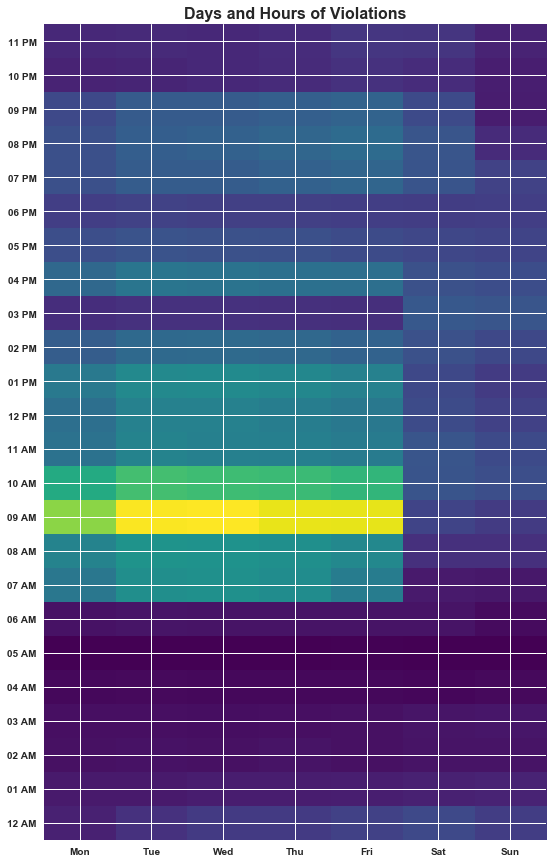

In [15]:
plt.figure(figsize=(9,15))
plt.title('Days and Hours of Violations', fontweight='bold',fontsize = 16);
plt.hist2d(df_date['weekday'],df_date['hourofday'],[np.linspace(-0.5,6.5,num=8),np.linspace(-0.5,23.5,num=25)]);
plt.xticks(np.arange(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontweight='bold');
hours_indx = [(datetime.time(i).strftime('%I %p')) for i in range(24)]
plt.yticks(np.arange(24), hours_indx, fontweight='bold');
plt.set_cmap('viridis')
plt.show()

In [16]:
df_CCPT16['license_plate_state'].value_counts().head(10)

IL    801960
IN     19241
WI     10813
MI      8255
OH      5368
TX      4252
CA      4001
FL      3509
IA      3453
MO      3259
Name: license_plate_state, dtype: int64

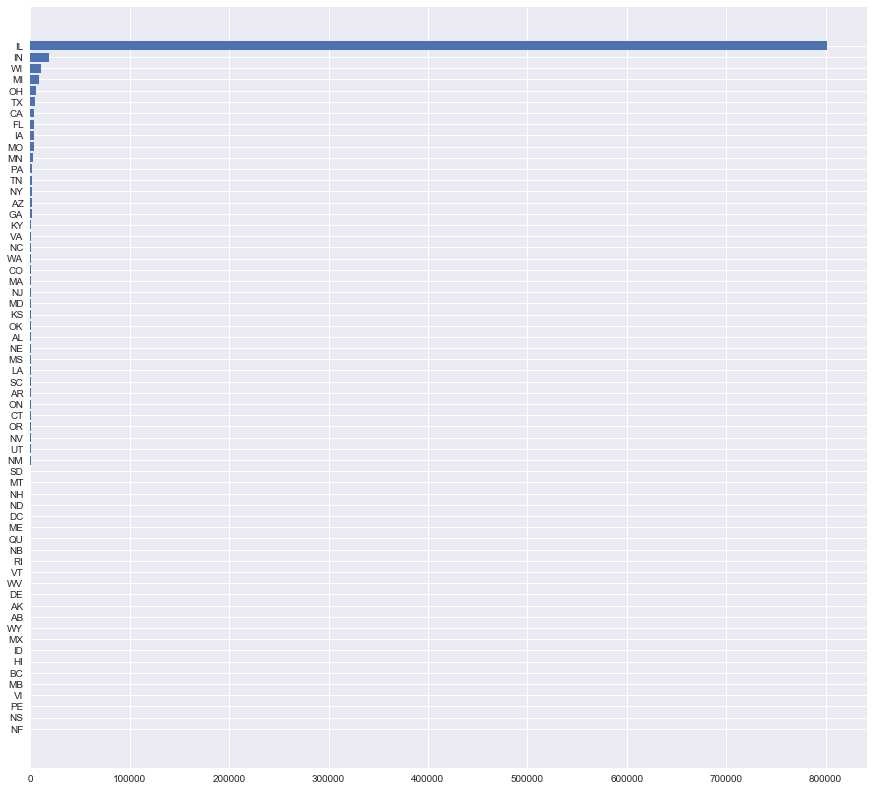

In [17]:
x_ticks = df_CCPT16['license_plate_state'].value_counts().index
heights = df_CCPT16['license_plate_state'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14)) 
# set horizontal bars
plt.barh(y_pos, heights)
 
# set names on the y-axis
plt.yticks(y_pos, x_ticks)
plt.gca().invert_yaxis() 
# plot figure
plt.show()

In [18]:
plate_state = df_CCPT16['license_plate_state'].value_counts().index
ticket_status = df_CCPT16['ticket_queue'].value_counts().index
# Here I categorize the ticket status in to 4:
# Paid, Dissmissed, Likely to be Guilty (Notice), Unlikely to pay (the rest: Define, Court, Bankrupcy,Hearing Req)
count_by_state = np.zeros([2,4])


mask_instate = (df_CCPT16['license_plate_state'] == 'IL')
count_by_state[0,0] = np.count_nonzero(df_CCPT16.loc[mask_instate]['ticket_queue'] == 'Paid')
count_by_state[0,1] = np.count_nonzero(df_CCPT16.loc[mask_instate]['ticket_queue'] == 'Dismissed')
count_by_state[0,2] = np.count_nonzero(df_CCPT16.loc[mask_instate]['ticket_queue'] == 'Notice') 
count_by_state[0,3] = df_CCPT16.loc[mask_instate]['ticket_queue'].size - np.sum(count_by_state[0,0:3])
                
mask_outstate = (df_CCPT16['license_plate_state'] != 'IL')
count_by_state[1,0] = np.count_nonzero(df_CCPT16.loc[mask_outstate]['ticket_queue'] == 'Paid')
count_by_state[1,1] = np.count_nonzero(df_CCPT16.loc[mask_outstate]['ticket_queue'] == 'Dismissed')
count_by_state[1,2] = np.count_nonzero(df_CCPT16.loc[mask_outstate]['ticket_queue'] == 'Notice') 
count_by_state[1,3] = df_CCPT16.loc[mask_outstate]['ticket_queue'].size - np.sum(count_by_state[1,0:3])

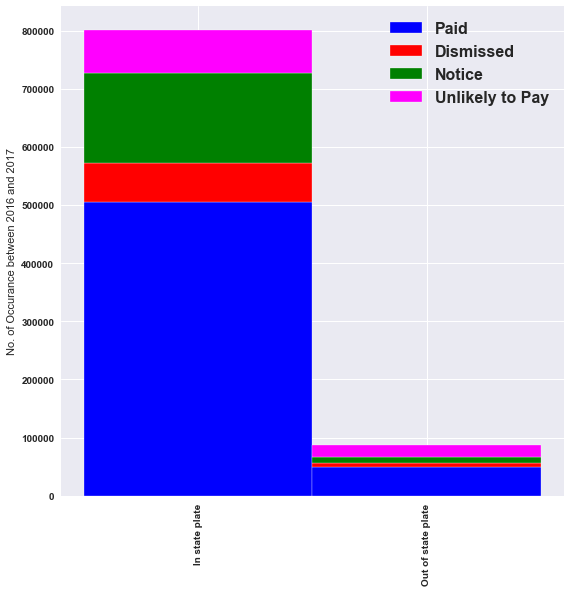

In [20]:
from matplotlib import rc

plt.figure(figsize=(9,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(2)
# bar width
BW = 1

plt.bar(r, count_by_state[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, count_by_state[:,1], bottom=count_by_state[:,0], color='red', edgecolor='white', width=BW,label='Dismissed')
plt.bar(r, count_by_state[:,2], bottom=np.sum(count_by_state[:,0:2],axis = 1), color='green', edgecolor='white', width=BW,label='Notice')
plt.bar(r, count_by_state[:,3], bottom=np.sum(count_by_state[:,0:3],axis = 1), color='magenta', edgecolor='white', width=BW,label='Unlikely to Pay')

plt.xticks(r, ['In state plate','Out of state plate'], fontweight='bold',rotation='vertical')
#plt.xlabel("Violation Type (Top 20)")
plt.ylabel("No. of Occurance between 2016 and 2017")
plt.legend(fontsize = 16)
plt.show()

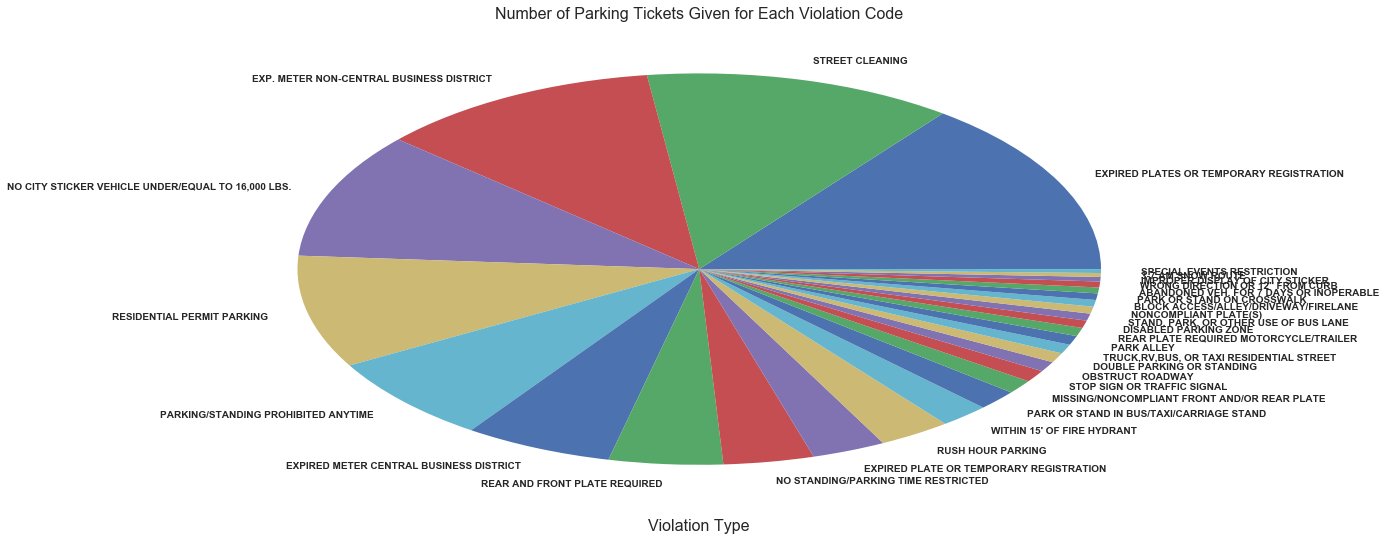

In [21]:
plt.figure(figsize=(18,9))
df_CCPT16['violation_description'].value_counts().head(30).plot(kind='pie')
#plt.tick_params(labelbottom='on')
plt.ylabel('', fontsize=16);
plt.xlabel('Violation Type', fontsize=16);
plt.title('Number of Parking Tickets Given for Each Violation Code', fontsize=16);
plt.show()

In [22]:
violation_type = df_CCPT16['violation_description'].value_counts().index
ticket_status = df_CCPT16['ticket_queue'].value_counts().index
# Here I categorize the ticket status in to 4:
# Paid, Dissmissed, Likely to be Guilty (Notice), Unlikely to pay (the rest: Define, Court, Bankrupcy,Hearing Req)
count_by_vt = np.zeros([20,4])

for vt_index in np.arange(20):
    mask = (df_CCPT16['violation_description'] == violation_type[vt_index])
    count_by_vt[vt_index,0] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Paid')
    count_by_vt[vt_index,1] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Dismissed')
    count_by_vt[vt_index,2] = np.count_nonzero(df_CCPT16.loc[mask]['ticket_queue'] == 'Notice') 
    count_by_vt[vt_index,3] = df_CCPT16.loc[mask]['ticket_queue'].size - np.sum(count_by_vt[vt_index,0:3])

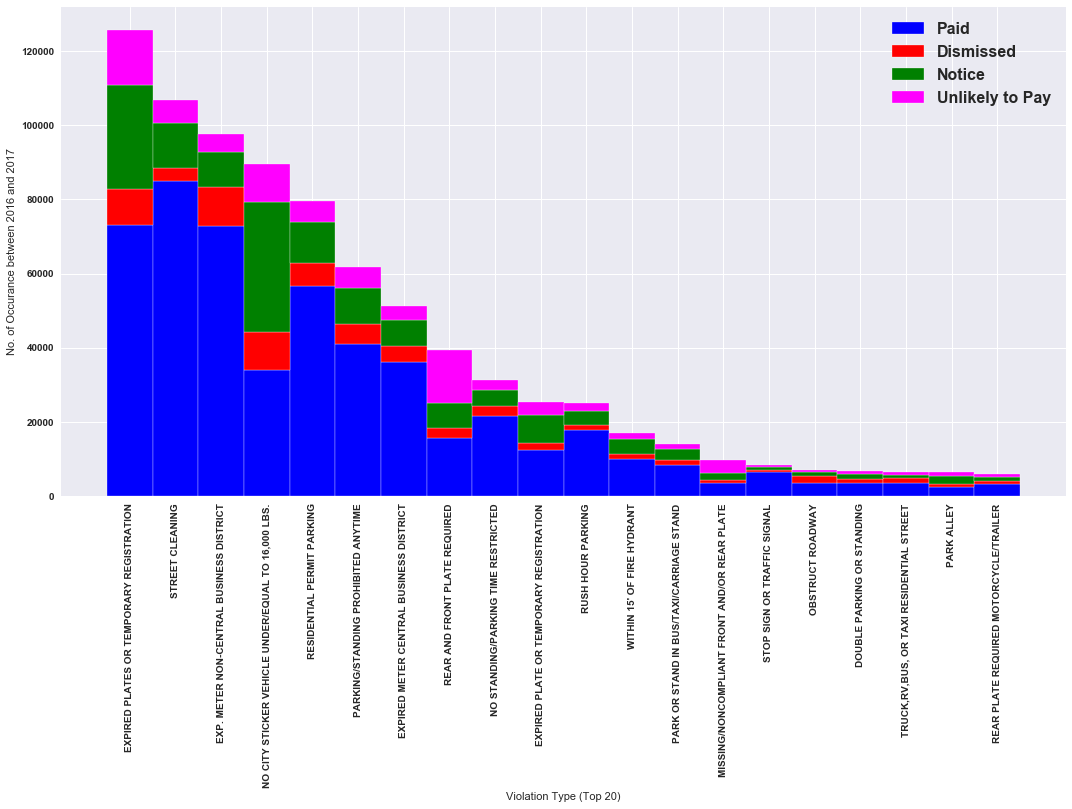

In [23]:
plt.figure(figsize=(18,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(20)
# bar width
BW = 1

plt.bar(r, count_by_vt[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, count_by_vt[:,1], bottom=count_by_vt[:,0], color='red', edgecolor='white', width=BW,label='Dismissed')
plt.bar(r, count_by_vt[:,2], bottom=np.sum(count_by_vt[:,0:2],axis = 1), color='green', edgecolor='white', width=BW,label='Notice')
plt.bar(r, count_by_vt[:,3], bottom=np.sum(count_by_vt[:,0:3],axis = 1), color='magenta', edgecolor='white', width=BW,label='Unlikely to Pay')

plt.xticks(r, violation_type[:20], fontweight='bold',rotation='vertical')
plt.xlabel("Violation Type (Top 20)")
plt.ylabel("No. of Occurance between 2016 and 2017")
plt.legend(fontsize = 16)
plt.show()

In [24]:
hd = {'Unique Entry': df_CCPT.nunique(axis = 0),
        'Nan Entry': df_CCPT.isnull().any()}
pd.DataFrame(data = hd, index = df_CCPT16.columns.values)


Unique Entry  Nan Entry
issue_date                  2977846      False
license_plate_state              63      False
license_plate_type              152       True
violation_code                  130      False
violation_description           128      False
vehicle_make                    175      False
fine_level1_amount               15      False
fine_level2_amount               16      False
current_amount_due            18837      False
total_payments                26346      False
ticket_queue                      7      False
ticket_queue_date              4159      False
notice_level                      5       True
hearing_disposition               2       True
officer                       22020      False
address                      187469      False

In [25]:
fine_amount = df_CCPT16[['fine_level1_amount','fine_level2_amount','current_amount_due','total_payments']]

In [26]:
# fine_level2 is always twice the fine_level1, which makes it not helpful here
np.mean(fine_amount['fine_level2_amount']//fine_amount['fine_level1_amount'])

2.0

In [27]:
fine_amount['final_amount'] = fine_amount['current_amount_due'] + fine_amount['total_payments']
fine_amount['due_or_not'] = fine_amount['current_amount_due'] > 0

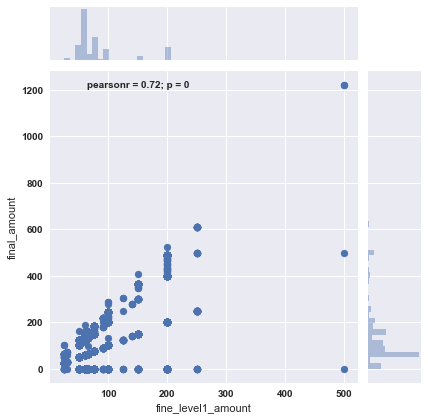

In [28]:
sns.set()
#ax = sns.scatterplot(x=fine_amount['fine_level1_amount'], y = fine_amount['final_amount'], hue=fine_amount['due_or_not'],data=tips)

ax = sns.jointplot(x = 'fine_level1_amount', y = 'final_amount',data=fine_amount[:10000])
plt.show()

In [38]:
fine_level = np.sort(df_CCPT16['fine_level1_amount'].unique())
fine_due_or_not = np.zeros([np.size(fine_level),2])

for fl_indx in np.arange(np.size(fine_level)):
    mask = (df_CCPT16['fine_level1_amount'] == fine_level[fl_indx])
    fine_due_or_not[fl_indx,0] = (np.count_nonzero(df_CCPT16.loc[mask]['current_amount_due'] <= 0)/df_CCPT16.loc[mask]['current_amount_due'].count()) # paid
    fine_due_or_not[fl_indx,1] = (np.count_nonzero(df_CCPT16.loc[mask]['current_amount_due'] > 0 )/df_CCPT16.loc[mask]['current_amount_due'].count()) # due

In [36]:
df_CCPT16.loc[mask]['current_amount_due'].count()

530

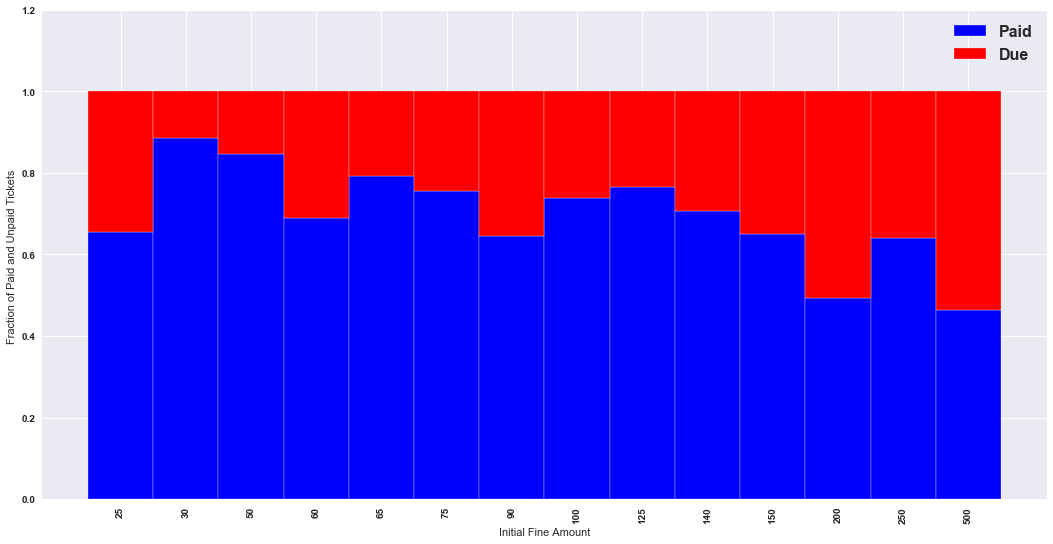

In [41]:
plt.figure(figsize=(18,9))
plt.tick_params(labelbottom=True)
rc('font',weight = 'bold')
r = np.arange(np.size(fine_level))
# bar width
BW = 1

plt.bar(r, fine_due_or_not[:,0], color='blue', edgecolor='white', width=BW,label = 'Paid')
plt.bar(r, fine_due_or_not[:,1], bottom=fine_due_or_not[:,0], color='red', edgecolor='white', width=BW,label='Due')

plt.xticks(r, fine_level, fontweight='bold',rotation='vertical')
plt.xlabel("Initial Fine Amount")
plt.ylabel("Fraction of Paid and Unpaid Tickets ")
plt.ylim((0,1.2))
plt.legend(fontsize = 16)
plt.show()



In [42]:
df_CCPT16['address'].head()

10              500 e 46, chicago, il
13     6100 s archer ave, chicago, il
20    4200 w irving park, chicago, il
25          1700 w grand, chicago, il
42       2200 n st louis, chicago, il
Name: address, dtype: object

In [43]:
address_df = pd.DataFrame(df_CCPT16['address'].str.split(', ').tolist(), columns=['address','city','state','None'])
#adderss_df.drop(columns = 'None',inplace = True)

In [44]:
address_df.head()

address     city state  None
0            500 e 46  chicago    il  None
1   6100 s archer ave  chicago    il  None
2  4200 w irving park  chicago    il  None
3        1700 w grand  chicago    il  None
4     2200 n st louis  chicago    il  None

In [45]:
address_df['city'].value_counts()

chicago    889767
louis           1
Name: city, dtype: int64

In [46]:
mask = (address_df['city']=='louis')
address_df.loc[mask]

address   city    state None
137135  600 n st  louis  chicago   il

In [47]:
# found anomoly here, change it
mask_add = (df_CCPT16['address'] == '600 n st, louis, chicago, il')
# I know this looks ugly, I haven't found a better way :(
df_CCPT16['address'] = df_CCPT16['address'].str.replace('600 n st, louis, chicago, il','600 n st louis, chicago, il')

In [48]:
df_CCPT16.loc[mask_add]['address']

871103    600 n st louis, chicago, il
Name: address, dtype: object

In [49]:
address_df = pd.DataFrame(df_CCPT16['address'].str.split(', ').tolist(), columns=['address','city','state'])

In [50]:
address_df['city'].value_counts()
# now the address should have been cleaned

chicago    889768
Name: city, dtype: int64

In [51]:
address_df['state'].unique()
print('Number of unique addresses: {}'.format(len(address_df['address'].unique())))

Number of unique addresses: 71689


In [ ]:
address_df = pd.DataFrame(address_df['address'].unique(), columns=['address'])
address_df['lat'] = np.nan
address_df['lng'] = np.nan
address_df.head()

In [ ]:
import geocoder
import requests
import time

In [ ]:
class GeoSessions:
    def __init__(self):
        self.Arcgis = requests.Session()
        self.Komoot = requests.Session()
        self.USCensus = requests.Session()
        self.OSM = requests.Session()

def create_sessions():
    return GeoSessions()

def geocode_address(address, s):
    g = geocoder.komoot(address, session=s.Komoot)
    if (g.ok == False):        
        g = geocoder.osm(address, session=s.OSM)
    if (g.ok == False):
        g = geocoder.arcgis(address, session=s.Arcgis)
    if (g.ok == False):
        g = geocoder.uscensus(address, session=s.USCensus)
    return g

In [ ]:
s = create_sessions()


In [ ]:
addr = address_df['address'][0] + ', Chicago, IL'
tmp = geocode_address(addr, s)
print(addr)
print('Latitude:  {}'.format(tmp.lat))
print('Longitude: {}'.format(tmp.lng))

In [ ]:
failed_inds = []
iter_between_saves = 100

In [ ]:
missing_latlon_ind = address_df[address_df['lat'].isnull()][:60001].index.tolist()

for i in missing_latlon_ind:
    try:
        if i%iter_between_saves == 0:
            print('reached index {}, saving df'.format(i))
            address_df.to_csv('CCPT_frac_1617.csv', index=False)
        addr = address_df['address'][i] + ', Chicago, IL'
        tmp = geocode_address(addr, s)
        address_df.loc[i,'lat'] = tmp.lat
        address_df.loc[i,'lng'] = tmp.lng
    except Exception as e:
        failed_inds.append(i)
address_df.to_csv('CCPT_frac_1617.csv', index=False)

In [ ]:
address_df[address_df['lat'].isnull()]

In [63]:
# load the presaved df for geocoded df
df_geoloc = pd.read_csv('../data/Geocoded_CCPT_1617.csv')
df_geoloc['address'] = df_geoloc['address'] + ', chicago, il'


In [64]:
geocoded_df = pd.merge(left=df_CCPT16, right=df_geoloc, how='inner', on='address')
geocoded_df.head()

issue_date license_plate_state license_plate_type violation_code  \
0 2016-05-19 17:40:00                  IL                PAS       0976160A   
1 2016-01-30 00:34:00                  IL                TMP       0976160F   
2 2016-11-05 20:35:00                  IL                PAS       0964100C   
3 2016-05-27 17:30:00                  IL                PAS       0964050J   
4 2017-11-24 16:23:00                  IL                PAS       0964100C   

                      violation_description vehicle_make  fine_level1_amount  \
0             REAR AND FRONT PLATE REQUIRED         LNDR                  60   
1  EXPIRED PLATES OR TEMPORARY REGISTRATION         CHRY                  60   
2      BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE         HOND                 150   
3                     DISABLED PARKING ZONE         FORD                 250   
4      BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE         DODG                 150   

   fine_level2_amount  current_amount_due  total_payments ticket_queue  \
0                 120                60.0             0.0       Define   
1                 120               146.4             0.0       Notice   
2                 300                 0.0           150.0         Paid   
3                 500                 0.0           250.0         Paid   
4                 300               300.0             0.0       Notice   

     ticket_queue_date notice_level hearing_disposition officer  \
0  2016-05-25 00:00:00          NaN                 NaN   05238   
1  2016-02-11 00:00:00         FINL                 NaN   10109   
2  2016-11-15 00:00:00          NaN                 NaN    5121   
3  2016-06-07 00:00:00          NaN                 NaN    5652   
4  2017-12-21 00:00:00         FINL                 NaN    5652   

                          address        lat        lng  
0           500 e 46, chicago, il  41.834909 -87.614170  
1           500 e 46, chicago, il  41.834909 -87.614170  
2  6100 s archer ave, chicago, il  41.794587 -87.770287  
3  6100 s archer ave, chicago, il  41.794587 -87.770287  
4  6100 s archer ave, chicago, il  41.794587 -87.770287

In [65]:
mask_chi = ((geocoded_df['lat']>=41.63) & (geocoded_df['lat']<= 42.05) &
               (geocoded_df['lng']>= -88.0) & (geocoded_df['lng']<= -87.5))

geocoded_df = geocoded_df.loc[mask_chi]

In [66]:
import folium
import folium.plugins as plugins

#from folium.plugins import HeatMap

In [67]:
chicago_lat = 41.8
chicago_lng = -87.7

In [68]:
df_permit = geocoded_df.loc[geocoded_df['violation_description'] == 'RESIDENTIAL PERMIT PARKING']
df_permit.head()
#df_CCPT16['issue_date'].groupby(df_CCPT16['issue_date'].dt.hour).count().plot(kind='bar')

issue_date license_plate_state license_plate_type violation_code  \
64  2017-11-17 18:07:00                  IL                PAS       0964090E   
720 2017-12-28 00:47:00                  IL                PAS       0964090E   
721 2016-02-12 00:45:00                  IL                PAS       0964090E   
722 2016-08-16 20:26:00                  IL                PAS       0964090E   
725 2016-10-07 17:37:00                  IL                PAS       0964090E   

          violation_description vehicle_make  fine_level1_amount  \
64   RESIDENTIAL PERMIT PARKING         TOYT                  75   
720  RESIDENTIAL PERMIT PARKING         VOLK                  75   
721  RESIDENTIAL PERMIT PARKING         NISS                  75   
722  RESIDENTIAL PERMIT PARKING         DODG                  75   
725  RESIDENTIAL PERMIT PARKING         PONT                  75   

     fine_level2_amount  current_amount_due  total_payments ticket_queue  \
64                  150                 0.0             0.0    Dismissed   
720                 150                 0.0            75.0         Paid   
721                 150                 0.0           150.0         Paid   
722                 150                 0.0            75.0         Paid   
725                 150                 0.0            75.0         Paid   

       ticket_queue_date notice_level hearing_disposition officer  \
64   2018-01-11 00:00:00         VIOL          Not Liable   11371   
720  2018-01-04 00:00:00          NaN                 NaN    1640   
721  2016-05-05 00:00:00         FINL                 NaN    1462   
722  2016-08-25 00:00:00          NaN                 NaN    1125   
725  2016-11-07 00:00:00         VIOL                 NaN     767   

                                 address        lat        lng  
64          2200 n st louis, chicago, il  41.928285 -87.714662  
720  800 s oakley boulevard, chicago, il  41.871201 -87.684071  
721  800 s oakley boulevard, chicago, il  41.871201 -87.684071  
722         1700 w cornelia, chicago, il  41.943056 -87.813918  
725         1700 w cornelia, chicago, il  41.943056 -87.813918

In [69]:
df_permit_hm = df_permit[['lat','lng']]

In [ ]:
# There are quite some outliers, here I will just remove the ones outside Chicago, 
# later I will do the more careful cleaning

mask_chi = ((df_permit['lat']>=41.63) & (df_permit['lat']<= 42.05) &
               (df_permit['lng']>= -88.0) & (df_permit['lng']<= -87.5))
df_permit_hm = df_permit_hm.loc[mask_chi]

In [70]:
permit_data = [[row['lat'],row['lng']] for index, row in df_permit_hm.iterrows()]

In [ ]:
np.size(permit_data)

In [71]:
m = folium.Map([chicago_lat,chicago_lng],  tiles = "Stamen Toner",zoom_start=10)
hm = plugins.HeatMap(permit_data,radius = 9)
hm.add_to(m)
m

In [72]:
df_permit['Weight'] = df_permit['issue_date'].dt.hour
df_permit['Weight'] = df_permit['Weight'].astype(float)
df_permit_hmt = df_permit[['lat','lng','Weight']]

In [73]:
permit_timeseries = [[[row['lat'],row['lng']] 
                           for index, row in df_permit_hmt[df_permit_hmt['Weight'] == i].iterrows()] for i in range(0,24)]

In [74]:
hours_indx = [(datetime.time(i).strftime('%I %p')) for i in range(24)]
mt = folium.Map([chicago_lat,chicago_lng],tiles = "Stamen Toner",zoom_start=10)
hmt = plugins.HeatMapWithTime(permit_timeseries,auto_play=True,radius = 5, min_opacity = 1,index = hours_indx)
hmt.add_to(mt)
mt

In [75]:
plt.figure(figsize=(16,8))
df_permit['issue_date'].groupby(df_permit['issue_date'].dt.hour).count().plot(kind='bar')
plt.tick_params(labelbottom='on')
plt.ylabel('No. of cars', fontsize=16);
plt.xlabel('Day Time', fontsize=16);
plt.title('Parking ticket issued at different time of the day', fontsize=16);


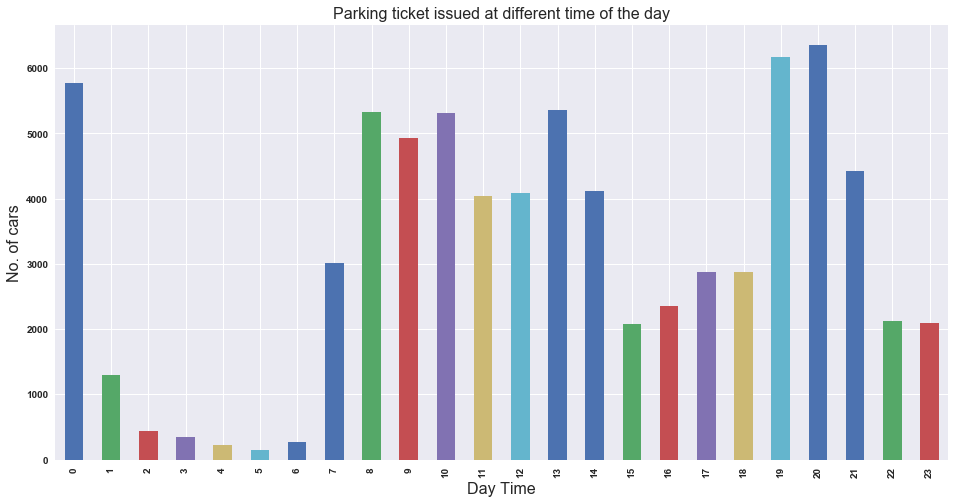

In [76]:
plt.show()

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
geocoded_df.head()

issue_date license_plate_state license_plate_type violation_code  \
0 2016-05-19 17:40:00                  IL                PAS       0976160A   
1 2016-01-30 00:34:00                  IL                TMP       0976160F   
2 2016-11-05 20:35:00                  IL                PAS       0964100C   
3 2016-05-27 17:30:00                  IL                PAS       0964050J   
4 2017-11-24 16:23:00                  IL                PAS       0964100C   

                      violation_description vehicle_make  fine_level1_amount  \
0             REAR AND FRONT PLATE REQUIRED         LNDR                  60   
1  EXPIRED PLATES OR TEMPORARY REGISTRATION         CHRY                  60   
2      BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE         HOND                 150   
3                     DISABLED PARKING ZONE         FORD                 250   
4      BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE         DODG                 150   

   fine_level2_amount  current_amount_due  total_payments ticket_queue  \
0                 120                60.0             0.0       Define   
1                 120               146.4             0.0       Notice   
2                 300                 0.0           150.0         Paid   
3                 500                 0.0           250.0         Paid   
4                 300               300.0             0.0       Notice   

     ticket_queue_date notice_level hearing_disposition officer  \
0  2016-05-25 00:00:00          NaN                 NaN   05238   
1  2016-02-11 00:00:00         FINL                 NaN   10109   
2  2016-11-15 00:00:00          NaN                 NaN    5121   
3  2016-06-07 00:00:00          NaN                 NaN    5652   
4  2017-12-21 00:00:00         FINL                 NaN    5652   

                          address        lat        lng  
0           500 e 46, chicago, il  41.834909 -87.614170  
1           500 e 46, chicago, il  41.834909 -87.614170  
2  6100 s archer ave, chicago, il  41.794587 -87.770287  
3  6100 s archer ave, chicago, il  41.794587 -87.770287  
4  6100 s archer ave, chicago, il  41.794587 -87.770287

In [78]:
to_drop = ['fine_level2_amount','current_amount_due','total_payments',
          'ticket_queue_date','notice_level','address']
geocoded_df.drop(labels=to_drop ,axis = 1,inplace = True)

In [79]:
hd = {'Unique Entry': geocoded_df.nunique(axis = 0),
        'Nan Entry': geocoded_df.isnull().any()}
pd.DataFrame(data = hd, index = geocoded_df.columns.values)

Unique Entry  Nan Entry
issue_date                   489040      False
license_plate_state              62      False
license_plate_type              132       True
violation_code                  111      False
violation_description           112      False
vehicle_make                    149      False
fine_level1_amount               14      False
ticket_queue                      7      False
hearing_disposition               2       True
officer                       10530      False
lat                           14758      False
lng                           14865      False

In [83]:
geocoded_df['hearing_disposition'].fillna('No Hearing',inplace = True)

In [84]:
geocoded_df['hearing_disposition'].value_counts()

No Hearing    765212
Not Liable     58314
Liable         32165
Name: hearing_disposition, dtype: int64

In [85]:
geocoded_df['ticket_queue'].value_counts()

Paid           533951
Notice         157280
Define          81369
Dismissed       73263
Bankruptcy       9229
Court             537
Hearing Req        62
Name: ticket_queue, dtype: int64

In [86]:
geocoded_df['Outcome'] = np.nan
geocoded_df['Outcome'] = geocoded_df['ticket_queue'].map( {'Paid': 0, 'Dismissed': 1, 'Notice': 2,'Define':3,'Bankruptcy':3,'Court':3,'Hearing Req':3} ).astype(int)
#geocoded_df.loc[geocoded_df['ticket_queue']=='Court']

In [87]:
wd = {'Month':geocoded_df['issue_date'].dt.month,
      'Weekday': geocoded_df['issue_date'].dt.weekday,
      'Hour': geocoded_df['issue_date'].dt.hour}
df_date = pd.DataFrame(data = wd, index = geocoded_df.index)

In [115]:
df_ml = pd.concat([geocoded_df,df_date],axis=1)

In [116]:
df_ml.head()

issue_date license_plate_state license_plate_type violation_code  \
0 2016-05-19 17:40:00                  IL                PAS       0976160A   
1 2016-01-30 00:34:00                  IL                TMP       0976160F   
2 2016-11-05 20:35:00                  IL                PAS       0964100C   
3 2016-05-27 17:30:00                  IL                PAS       0964050J   
4 2017-11-24 16:23:00                  IL                PAS       0964100C   

                      violation_description vehicle_make  fine_level1_amount  \
0             REAR AND FRONT PLATE REQUIRED         LNDR                  60   
1  EXPIRED PLATES OR TEMPORARY REGISTRATION         CHRY                  60   
2      BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE         HOND                 150   
3                     DISABLED PARKING ZONE         FORD                 250   
4      BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE         DODG                 150   

  ticket_queue hearing_disposition officer        lat        lng  Outcome  \
0       Define          No Hearing   05238  41.834909 -87.614170        3   
1       Notice          No Hearing   10109  41.834909 -87.614170        2   
2         Paid          No Hearing    5121  41.794587 -87.770287        0   
3         Paid          No Hearing    5652  41.794587 -87.770287        0   
4       Notice          No Hearing    5652  41.794587 -87.770287        2   

   Month  Weekday  Hour  
0      5        3    17  
1      1        5     0  
2     11        5    20  
3      5        4    17  
4     11        4    16

In [117]:
mask_in_state = (df_ml['license_plate_state'] == 'IL')
df_ml['Plate_State'] = np.zeros(df_ml['license_plate_state'].count()).astype(int)
df_ml.loc[mask_in_state,'Plate_State'] = np.ones(df_ml.loc[mask_in_state]['Plate_State'].count()).astype(int)

In [118]:
df_ml['license_plate_type'].value_counts().head(20)

PAS    728753
TRK     40702
TMP     33151
TXI      9464
DLC      4484
FFM      3365
HCP      3087
MCY      2647
LIV      1924
ENV      1730
APP      1701
CBK      1102
SOX       873
PML       836
COL       813
DOM       811
PFR       609
ELE       567
CUB       534
BRS       453
Name: license_plate_type, dtype: int64

In [119]:
LPT_Top12 =df_ml['license_plate_type'].value_counts().index[:12]

In [121]:
#mask_plate_type = df_ml['license_plate_type'].isin(['PAS','TRK','TMP','TXI','DLC','FFM'])
mask_plate_type = df_ml['license_plate_type'].isin(LPT_Top12)
df_ml.loc[~mask_plate_type,'license_plate_type'] = 'OTH'

In [123]:
df_ml['license_plate_type'].value_counts()

PAS    728753
TRK     40702
TMP     33151
OTH     23581
TXI      9464
DLC      4484
FFM      3365
HCP      3087
MCY      2647
LIV      1924
ENV      1730
APP      1701
CBK      1102
Name: license_plate_type, dtype: int64

In [130]:
df_ml['vehicle_make'].value_counts()

CHEV    108068
FORD     90161
TOYT     89077
HOND     71956
NISS     65873
DODG     39751
JEEP     37122
HYUN     31409
VOLK     25424
CHRY     21781
PONT     19889
BMW      19568
BUIC     18799
LEXU     16581
MERZ     16536
KIA      15909
GMC      15577
MAZD     14958
ACUR     13517
AUDI     11830
CADI     11675
SUBA     11248
INFI     10498
MITS      8893
MERC      8295
LINC      7285
SATR      6847
VOLV      6802
OLDS      5038
SCIO      3681
         ...  
PACK         3
LING         3
WILS         3
RENU         3
ZHON         2
ROKW         2
BERO         2
YUGO         2
LOTU         2
TWNG         2
DATS         2
JENS         2
VIKI         2
OPEL         1
ZHG          1
GUST         1
PEUG         1
VELO         1
JONW         1
ZHEJ         1
SHEN         1
FSKR         1
LEIK         1
CANA         1
SANY         1
PUCH         1
PEIR         1
VNTO         1
CAP          1
LIFA         1
Name: vehicle_make, Length: 149, dtype: int64

In [125]:
violation_type = df_ml['violation_description'].value_counts().index
mask_vio_type = df_ml['violation_description'].isin(violation_type[:25])
df_ml.loc[~mask_vio_type,'violation_description'] = 'OTHER'

In [131]:
hd = {'Unique Entry': df_ml.nunique(axis = 0),
        'Nan Entry': df_ml.isnull().any()}
pd.DataFrame(data = hd, index = df_ml.columns.values)

Unique Entry  Nan Entry
issue_date                   489040      False
license_plate_state              62      False
license_plate_type               13      False
violation_code                  111      False
violation_description            26      False
vehicle_make                    149      False
fine_level1_amount               14      False
ticket_queue                      7      False
hearing_disposition               3      False
officer                       10530      False
lat                           14758      False
lng                           14865      False
Outcome                           4      False
Month                            12      False
Weekday                           7      False
Hour                             24      False
Plate_State                       2      False

In [132]:
to_drop = ['issue_date','license_plate_state','violation_code','ticket_queue']
df_ml.drop(labels=to_drop ,axis = 1,inplace = True)

In [133]:
df_ml.columns

Index(['license_plate_type', 'violation_description', 'vehicle_make',
       'fine_level1_amount', 'hearing_disposition', 'officer', 'lat', 'lng',
       'Outcome', 'Month', 'Weekday', 'Hour', 'Plate_State'],
      dtype='object')

In [134]:
df_ml.Outcome.value_counts()

0    533951
2    157280
3     91197
1     73263
Name: Outcome, dtype: int64

In [135]:
df_ml.to_csv('CCPT_ML_V2.csv', index=False)

In [ ]:
df_ml = pd.read_csv('./CCPT_ML.csv')

In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
h2o.cluster().shutdown()

In [ ]:
#data = h2o.import_file('CCPT_ML.csv')

#h2o.connect()

h2o.init(ip='localhost',max_mem_size = '32G',min_mem_size = '20G')

In [ ]:
h2o.remove_all()

In [ ]:
h2o.ls()

In [ ]:
hf_ml = h2o.H2OFrame(df_ml)

In [ ]:
hf_ml.head()

In [ ]:
hf_ml["license_plate_type"]= hf_ml["license_plate_type"].asfactor()
hf_ml["violation_description"]= hf_ml["violation_description"].asfactor()
#hf_ml["vehicle_make"]= hf_ml["vehicle_make"].asfactor()
hf_ml["Plate_State"]= hf_ml["Plate_State"].asfactor()
#hf_ml["Month"]= hf_ml["Month"].asfactor()
#hf_ml["Weekday"]= hf_ml["Weekday"].asfactor()
#hf_ml["Hour"]= hf_ml["Hour"].asfactor()
hf_ml["Outcome"]= hf_ml["Outcome"].asfactor()

In [ ]:
#train, test = hf_ml.split_frame(ratios=[0.8])
train, valid, test = hf_ml.split_frame([0.6, 0.2], seed=1234)

In [ ]:
train_col = ['license_plate_type','violation_description','fine_level1_amount',
             'Plate_State','Month', 'Weekday', 'Hour']
response_col = 'Outcome'

In [ ]:
model = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=10)

In [ ]:
model.train(x=train_col, y=response_col, training_frame=train, validation_frame = valid)

In [ ]:
# Model performance
performance = model.model_performance(test_data=test)

print(performance)

In [ ]:
model.score_history()

In [ ]:
model.plot()

In [ ]:
model.varimp_plot()

In [ ]:
# save the model
model_path = h2o.save_model(model=model, path="../model", force=True)

print(model_path)

# load the model
#saved_model = h2o.load_model(model_path)

In [ ]:
hf_ml.summary()

In [ ]:
train_col = ['license_plate_type','violation_description','fine_level1_amount',
             'Plate_State','Month', 'Weekday', 'Hour']
response_col = 'Outcome'

In [ ]:
RF_v2 = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=10,categorical_encoding = 'SortByResponse')

In [ ]:
RF_v2.train(x=train_col, y=response_col, training_frame=train, validation_frame = valid)

In [ ]:
# Model performance
performance = RF_v2.model_performance(test_data=test)

print(performance)

In [ ]:
RF_v2.varimp_plot()

In [ ]:
# save the model
model_path = h2o.save_model(model=RF_V2, path="../model", force=True)

print(model_path)